# Understanding Descriptive Statistics

Import the necessary libraries here:

In [104]:
# Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [105]:
# your code here
def roll_dice(n):
    
    """roll n times of dice"""
    dice = [1, 2, 3, 4, 5, 6]
    lst = []
    for i in range(n):
        lst.append(np.random.choice(dice,1)[0])
    
    return lst


results = roll_dice(10)
results

[5, 2, 1, 4, 3, 1, 2, 6, 6, 6]

#### 2.- Plot the results sorted by value.

In [ ]:
# your code here

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [40]:
# your code here
df = pd.Series(results)
df.value_counts(normalize = True)

5    0.3
6    0.2
2    0.2
1    0.1
3    0.1
4    0.1
dtype: float64

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [41]:
# your code here
def get_avg(lst):
    total = np.sum(lst)
    counts = len(lst)
    avg = total / counts
    return avg

t = get_avg(df)
t

3.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [46]:
# your code here

def get_freq(lst):
    return lst.value_counts(normalize = True)

freq = get_freq(df)
t = get_avg(freq)
t

0.16666666666666666

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [70]:
# your code here
def get_median(lst):
    lst = lst.sort_values()
    lst.reset_index(drop = True, inplace = True)
    length = len(lst)
    
    if length % 2 == 0:
        med = (lst[length/2-1] + lst[length/2])/2
    else:
        med = lst[(length+1)/2 - 1]
    return med

get_median(df)

10
4


4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [130]:
# your code here
def get_quartile(lst):
    lst = lst.sort_values().copy()
    lst.reset_index(drop = True, inplace = True)
    median = get_median(lst)
    l = len(lst)
    if l % 2 == 0:
        first_half = lst[:l//2-1]
        second_half = lst[l//2-1:]
        q1 = get_median(first_half)
        q3 = get_median(second_half)
    else:
        first_half = lst[:l//2-1]
        second_half = lst[l//2:]
        q1 = get_median(first_half)
        q3 = get_median(second_half)
    return np.array([q1, median, q3])

In [131]:
print(df.value.value_counts())
mine = get_quartile(df.value)
ans = np.quantile(df.value, [0.25, 0.50, 0.75])
print(mine, ans)

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64
100
4
49
51
[2. 4. 5.] [2. 4. 5.]


In [103]:
df

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [133]:
# your code here
df = pd.read_csv('roll_the_dice_hundred.csv')

In [134]:
"""
your comments here
"""
df.value.value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [135]:
# your code here
get_avg(df.value)

3.74

#### 3.- Now, calculate the frequency distribution.


In [136]:
# your code here
df.value.value_counts(normalize = True)

6    0.23
4    0.22
2    0.17
3    0.14
1    0.12
5    0.12
Name: value, dtype: float64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

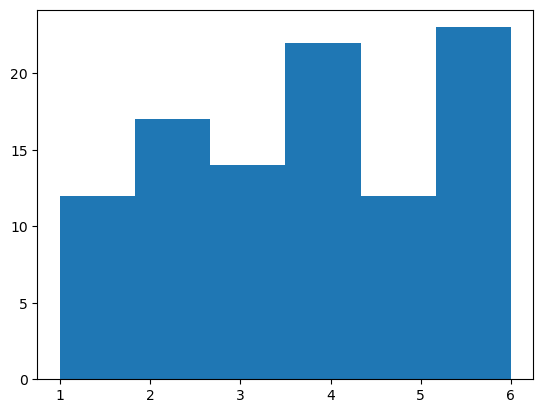

In [144]:
# your code here
plt.hist(df.value, bins = 6)

In [ ]:
"""
your comments here

the data has quite large variance and it's coherent to the mean value which is slightly larger than expected mean

as we have slightly more greater than 3 values

"""


#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([175., 167., 175., 168., 149., 166.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

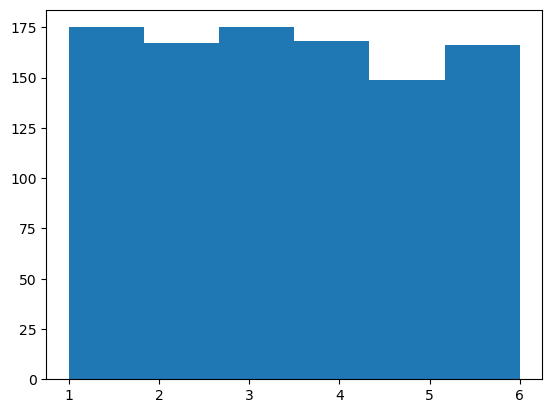

In [143]:
# your code here
df2 = pd.read_csv('roll_the_dice_thousand.csv')
df2.value.value_counts(normalize = True) 
plt.hist(df2.value, bins = 6)

In [ ]:
"""
your comments here

as the sample size increases, the frequency coincides with the expected values

"""


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(array([  7.,  10.,  23.,  36.,  45.,  70.,  94., 110., 123., 138., 116.,
         78.,  51.,  48.,  21.,  15.,  11.,   3.,   0.,   1.]),
 array([ 1.  ,  5.05,  9.1 , 13.15, 17.2 , 21.25, 25.3 , 29.35, 33.4 ,
        37.45, 41.5 , 45.55, 49.6 , 53.65, 57.7 , 61.75, 65.8 , 69.85,
        73.9 , 77.95, 82.  ]),
 <BarContainer object of 20 artists>)

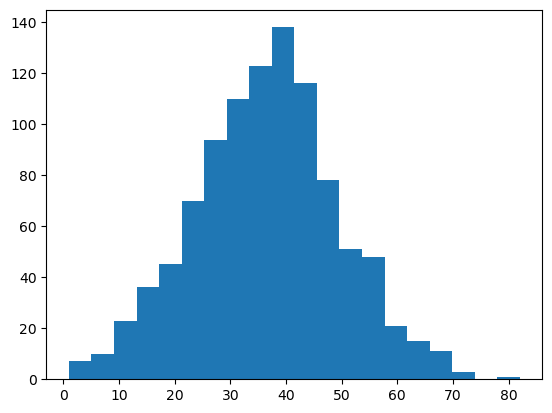

In [94]:
# your code here
ages = pd.read_csv('ages_population.csv')
plt.hist(ages.observation, bins=20)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [88]:
"""
your comments here
"""
avg = get_avg(ages.observation)
std = np.std(ages.observation)
std

12.81008977329979

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

(array([ 16.,  17.,  35.,  41.,  78.,  98., 120., 264., 115.,  90.,  61.,
         31.,  22.,   7.,   5.]),
 array([19.        , 20.13333333, 21.26666667, 22.4       , 23.53333333,
        24.66666667, 25.8       , 26.93333333, 28.06666667, 29.2       ,
        30.33333333, 31.46666667, 32.6       , 33.73333333, 34.86666667,
        36.        ]),
 <BarContainer object of 15 artists>)

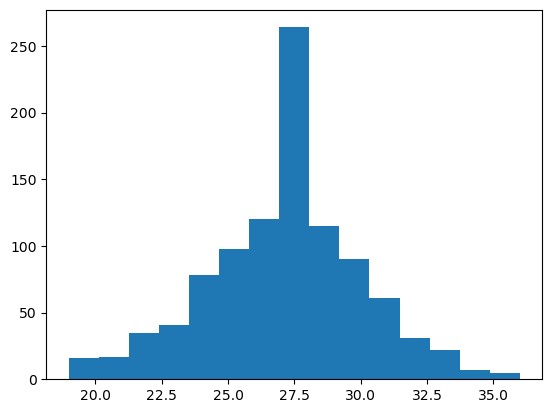

In [96]:
# your code here
ages2 = pd.read_csv('ages_population2.csv')
plt.hist(ages2.observation, bins = 15
        )

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

yes, the range is much narrower than in step 1. the data is also more centered at 27

"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [146]:
# your code here
avg2 = get_avg(ages2.observation)
std2 = np.std(ages2.observation)
print(avg2, std2)

27.155 2.9683286543103704


In [ ]:
"""
your comments here

it's coherent with the histogram as said in previous answer
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(array([ 5.,  2.,  4.,  8., 22., 31., 36., 47., 52., 70., 74., 88., 75.,
        61., 63., 58., 52., 36., 24., 20., 27., 56., 53., 25., 11.]),
 array([ 1.  ,  4.04,  7.08, 10.12, 13.16, 16.2 , 19.24, 22.28, 25.32,
        28.36, 31.4 , 34.44, 37.48, 40.52, 43.56, 46.6 , 49.64, 52.68,
        55.72, 58.76, 61.8 , 64.84, 67.88, 70.92, 73.96, 77.  ]),
 <BarContainer object of 25 artists>)

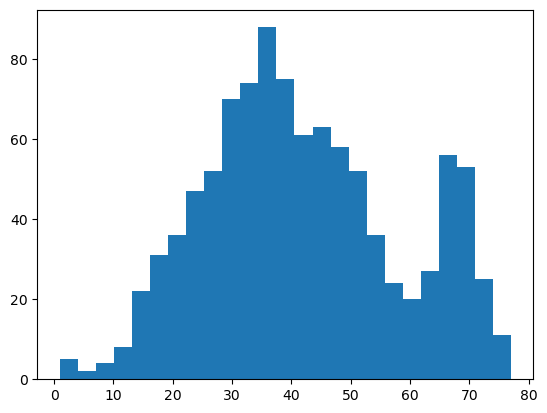

In [147]:
# your code here
ages3 = pd.read_csv('ages_population3.csv')
plt.hist(ages3.observation, bins = 25)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [151]:
# your code here
avg3 = get_avg(ages3.observation)
std3 = np.std(ages3.observation)
print(avg3, std3)

41.989 16.136631587788084


In [ ]:
"""
your comments here

the mean is greater because the dataset is centered at around 40

variance also greater due to the big amount of outliers at age around 70
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [158]:
# your code here
get_quartile(ages3.observation)
# np.quantile(ages3.observation, [.25,.5,.75])

1000
40.0
499
501


array([30., 40., 53.])

In [ ]:
"""
your comments here

the median is very close to the mean

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""